In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pyodbc
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# Q6\) What is the relationship between the size of the stores, number of employees and revenue?

There are three continous variables: size of store, number of employees and revenue. So there are 2 options:

Use color or size of scatter point to illustrate the size of store
Seperate out the variables into multiple graphs -> Lets try both...

In [2]:
df = pd.read_csv(r"C:\Users\sebsj\Documents\Computer Science\GenerationDataAnalyst\InterimProject\analysis\Q6_data.csv")
df.head()

,BusinessEntityID,StoreName,SquareFeet,NumberEmployees,TotalSales
0,292,Next-Door Bike Store,21000,13,147804.9208
1,294,Professional Sales and Service,18000,14,127379.7919
2,296,Riders Company,21000,15,584949.1308
3,298,The Bike Mechanics,18000,16,77585.1950
4,300,Nationwide Supply,21000,17,249804.8673


[Text(0.5, 0, 'Number of Employees'), Text(0, 0.5, 'Revenue')]

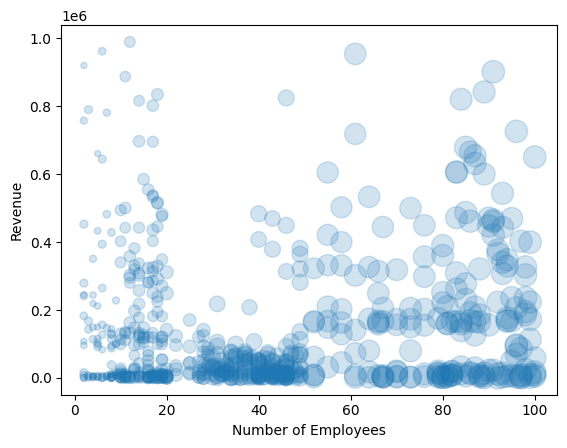

In [3]:
fig, ax = plt.subplots()
ax.scatter(df["NumberEmployees"],
        df["TotalSales"],
        s=df["SquareFeet"]/300,
        alpha=0.2)
ax.set(xlabel="Number of Employees",
       ylabel="Revenue")

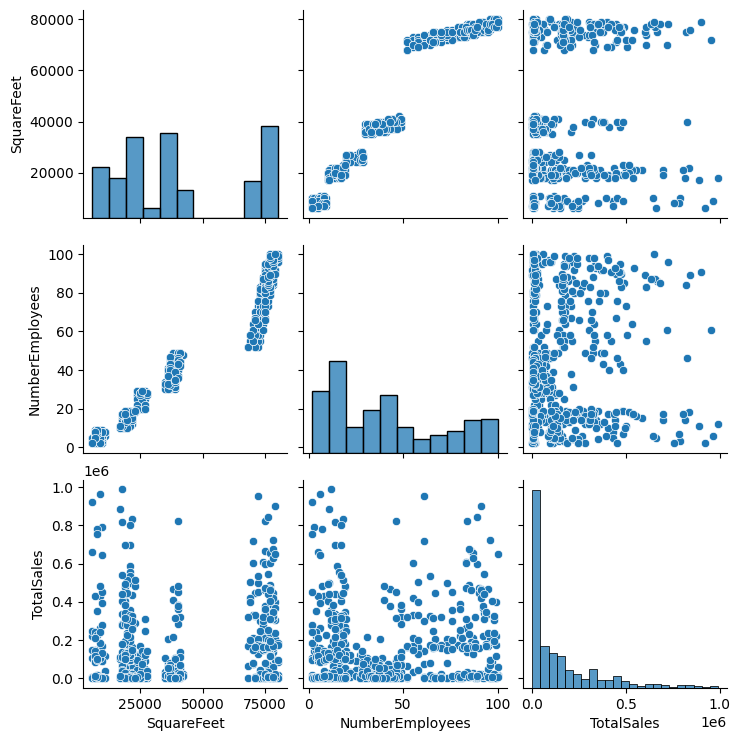

In [4]:
sns.pairplot(df, 
             vars=["SquareFeet", "NumberEmployees", "TotalSales"])

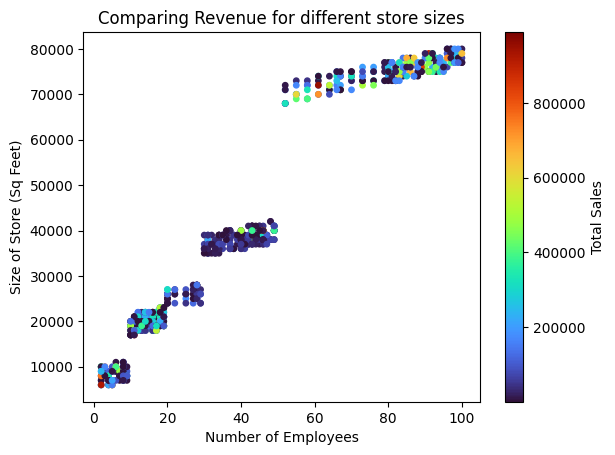

In [5]:
plt.style.use('seaborn-v0_8-colorblind')
fig, ax = plt.subplots()

scatter = ax.scatter(df["NumberEmployees"], 
                     df["SquareFeet"],
            c=df["TotalSales"],
            marker="o",
            cmap='turbo',
            s=15)
# legend with unique colours from scatter
# legend = ax.legend(*scatter.legend_elements(),
#                    loc="upper left", title="Revenue")
# ax.add_artist(legend)
cbar = plt.colorbar(scatter)
cbar.set_label("Total Sales")

ax.set(xlabel="Number of Employees",
       ylabel="Size of Store (Sq Feet)",
       title="Comparing Revenue for different store sizes")
plt.show()

This scatter plot depicts sales amounts, with each data point representing a combination of number of employees and size of the store. We observe the number of employees for similar sized stores are clustered together. The makes sense since larger stores typically require more employees to effectively operate. 
We sales values are mixed together and we see no pattern between the size of the store or number of employees and the total sales. 

# Correlation Coefficient

Let's calculate the correlation coefficient (denoted as r) to get a description of the <b>Linear</b> relationship between two variables.

First let's test the correlation between number of employees and size of store (sq_feet). From the graph above have reason to think there is a positive relationship:

- Null hypothesis: there is no relationship between number of employees and size of a store.

- Alternative hypothesis: there is a positive relationship between number of employees and size of store.

In [6]:
stats.pearsonr(df["SquareFeet"],
            df["NumberEmployees"])

PearsonRResult(statistic=0.9709256906116681, pvalue=0.0)

We get:
- Pearson's r = 0.971
- A p-value. Represents the likelihood the relationship between size of store (sqft) and number of employees could have happend by random chance alone. We get 0.0 which suggests the relationship we observe is unlikely to have occured just by random chance -> our test is statistically significant and we reject the null hypothesis.

We can conclude based on this r value that there is a strong linear relationship between size of store and number of employees. This suggests that as the size of the store (sqfeet) increases, the number of employees tends to increase aswell. However, it's important to note that while this correlation exists, it does not necessarily indicate causation and we would need to conduct further experiments.

NB: from this r value it is equally as valid to say 'the number of employees influences the size of the store'. But, common sense tells us that larger stores are driving the need for more employees, so we can infer this direction in the relationship. 

In [7]:
rvs = ["SquareFeet","NumberEmployees",  "TotalSales"]
selected_df = df[rvs]
cormat = selected_df.corr()
round(cormat, 2)

,SquareFeet,NumberEmployees,TotalSales
SquareFeet,1.00,0.97,0.10
NumberEmployees,0.97,1.00,0.09
TotalSales,0.10,0.09,1.00


<Axes: >

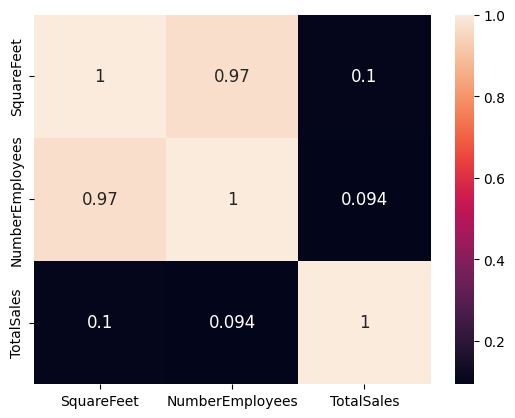

In [8]:
# sns.heatmap(cormat)
# plot a heatmap with annotation
sns.heatmap(cormat, annot=True, annot_kws={"size": 12})

If we focus on the TotalSales column, both square feet (size of store) and total sales have very low positive correlation values that indicate there is little to no relationship and AdventureWorks should explore other factors if they want to influence sales.